The first thing to do is load some dependencies. For this notebook, I will need numpy, pyplot from matplotlib, and integrate from scipy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate


In the box below, I define a variety of constants that I will need throughout this notebook, like different values of the gas constant, R.

In [3]:
barL_R = 0.083144
joule_R = 8.3144
atmL_R = 0.082057


It's common in thermodynamics to express pressure as a function of other state variables. For example, the ideal gas law is commonly expressed as $p = \frac{nRT}{V}$. Below, I have done this in a useful way for python. I have defined a function, called 'idealP', which will take a number of moles (n), a volume (in liters), and a temperature (in Kelvin) and return a pressure (in bars) using the ideal gas law. In addition, this function can calculate the pressure (in other units) of an ideal gas by using other values of R as the fourth argument to the function.

In [4]:
def idealP(n, vol, temp, gasConst = barL_R):
    return n*gasConst*temp/vol



To test it out, here is the pressure (in different units) of an ideal gas:

In [10]:
print('The pressure of 1 mole of gas in a 22.4 L container at 298 K is {:.3f} bar'.format(idealP(1, 22.4, 298)))

print('The pressure of 1 mole of gas in a 22.4 L container at 298 K is {:.3f} atm'.format(idealP(1, 22.4, 298, atmL_R)))

print('The pressure of 1 mole of gas in a 22.4 L container at 298 K is {:.1f} kPa'.format(idealP(1, 22.4, 298, joule_R)))


The pressure of 1 mole of gas in a 22.4 L container at 298 K is 1.106 bar
The pressure of 1 mole of gas in a 22.4 L container at 298 K is 1.092 atm
The pressure of 1 mole of gas in a 22.4 L container at 298 K is 110.6 kPa


If this was it, though, then python wouldn't be very useful for this type of problem. All of these calculations can be done by hand pretty quickly, and so the time it took to put all of this in python didn't save us anything. However, we can also create functions that are harder to work with by hand. For example, the pressure of a van der Waals gas is $p = \frac{nRT}{(V-nb)} - a{(\frac{n}{V})}^{2}$, where a and b are gas specific constants. Here's what that looks like in python.

In [5]:
def vanderWaalsP(n, a, b, vol, temp, gasConst = barL_R):
    factOne = n*gasConst*temp/(vol - n*b)
    factTwo = a*n**2/vol**2
    return factOne - factTwo



Now I can quickly calculate the pressure of a van der Waals gas to see how it compares to an ideal gas. In this case I'm calculating the pressure for nitrogen ($a = 1.370 \frac{L^{2} bar}{mol^{2}}, b = 0.0387 \frac{L}{mol}$) using the same conditions I used above for the ideal gas.

In [6]:
print('The pressure of 1 mole of nitrogen (as a van der Waals gas) in a 22.4 L container at 298 K is {:.3f} bar'.format(vanderWaalsP(1, 1.370, 0.0387, 22.4, 298)))


The pressure of 1 mole of nitrogen (as a van der Waals gas) in a 22.4 L container at 298 K is 1.105 bar


While this isn't that challenging, it is a little more work than calculating pressure for an ideal gas. I can also calculate pressure for a variety of different gases using the same function. For example, here's the pressure for methane ($a = 2.253 \frac{L^{2} bar}{mol^{2}}, b = 0.04278 \frac{L}{mol}$) under the same conditions as the nitrogen, above, using the vdW equation.


In [7]:
print('The pressure of 1 mole of methane (as a van der Waals gas) in a 22.4 L container at 298 K is {:.3f} bar'.format(vanderWaalsP(1, 2.253, 0.04278, 22.4, 298)))


The pressure of 1 mole of methane (as a van der Waals gas) in a 22.4 L container at 298 K is 1.104 bar


The other nice thing about doing this in python, compared to doing it on paper, is I can quickly calculate and compare a lot of different conditions. For example, in the space below I'm creating an array of different temperatures (xrange), then calculating the pressure of an ideal gas and a van der Waals gas (nitrogen, in this case) at all of those temperatures. Then, I'm calculating the percent error between the two calculations and plotting the percent error as a function of temperature.

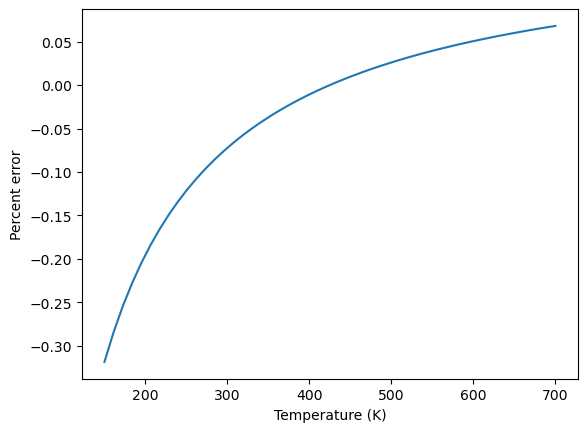

In [8]:
xrange = np.linspace(150,700)
yrangeIdeal = idealP(1, 22.4, xrange)
yrangevdW = vanderWaalsP(1, 1.370, 0.0387, 22.4, xrange)

errorRange = 100*(yrangevdW - yrangeIdeal)/yrangevdW

plt.plot(xrange, errorRange)
plt.xlabel("Temperature (K)")
plt.ylabel("Percent error")
plt.show()

Let's also take a look at the error associated with different container volumes at a constant temperature.

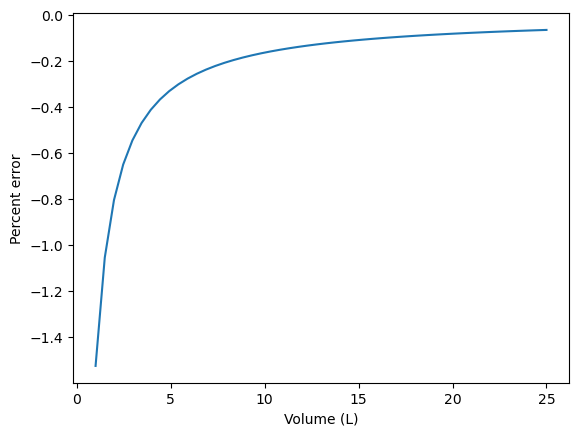

In [9]:
xrange = np.linspace(1,25)
yrangeIdeal = idealP(1, xrange, 298)
yrangevdW = vanderWaalsP(1, 1.370, 0.0387, xrange, 298)

errorRange = 100*(yrangevdW - yrangeIdeal)/yrangevdW

plt.plot(xrange, errorRange)
plt.xlabel("Volume (L)")
plt.ylabel("Percent error")
plt.show()

Consider both graphs above. In the space below, describe both graphs and explain whether or not the behavior is consistent with what you know about the ideal gas law and the van der Waals equation:



I don't really see any difference so I don't know

In the box below, write code to plot the percent error between the van der Waals equation and the ideal gas equation for xenon ($a = 4.250 \frac{L^{2} bar}{mol^{2}}, b = 0.05105 \frac{L}{mol}$) as a function of container volume. Is xenon more or less ideal than nitrogen?

While the van der Waals gas is generally an improvement over the ideal gas law, it's actually not all that accurate and is primarily used because it's convenient and easy to work with (on paper). A much better state equation for modeling real gases is the [Redlich-Kwong equation of state](https://en.wikipedia.org/wiki/Redlich%E2%80%93Kwong_equation_of_state), $p = \frac{nRT}{V - nb} - \frac{n^{2}a}{T^{1/2}V(V + nb)}$, where $a = \frac{R^{2}T_{c}^{2.5}}{9p_{c}(2^{1/3}-1)}$, $b = \frac{RT_{c}(2^{1/3}-1)}{3p_{c}}$, and $p_{c}$ and $T_{c}$ are the critical pressure and temperature of the gas being modeled. In the box below, write a function, similar to the vanderWaalsP function above, that takes six arguments (number of moles (n), [critical pressure](https://en.wikipedia.org/wiki/Critical_point_(thermodynamics)) (critPress), [critical temperature](https://en.wikipedia.org/wiki/Critical_point_(thermodynamics)) (critTemp), volume (vol), temperature (temp), and gas constant (gasConst) and returns the pressure of a gas modeled by the Redlich-Kwong equation of state. My recommendation would be to have the function calculate a and b first, then the two halves of the RK equation, then return the difference. To keep things consistent and to help make sure the units cancel, use Kelvin for all your temperatures, bar for all your pressures, and the R value that uses bar, Kelvin, and liters. To calculate powers in python, you use ** followed by the power (2 or 1/3, for example), similar to how I squared n and volume in the vanderWaalsP function, above.

Below, test your function to make sure that the pressure calculated is what you expect. Specifically, calculate the pressure of 1 mole of [nitrogen](https://en.wikipedia.org/wiki/Nitrogen) in a 22.4 L container at 298 K, and compare it to the pressure calculated above for an ideal gas and a van der Waals gas.

In the space below, calculate the percent error between your Redlich-Kwong function and the ideal gas law for 1 mole of nitrogen in a 22.4 L container over a temperature range of 150 to 700 K, then graph the percent error as a function of temperature. Be sure to label your axes!

In the space below, calculate the percent error between your Redlich-Kwong function and the ideal gas law for 1 mole of nitrogen at 298 K in containers with volumes ranging from 1 to 25 L, then graph the percent error as a function of volume. Again, be sure to label your axes!